In [177]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [178]:
#Input excel
df = pd.read_csv("wdbc.csv",index_col= 0)
#Menampilkan nilai dari seluruh kolom dan baris
df.head

<bound method NDFrame.head of          Diagnosis  Radius1  Texture1  Perimeter1   Area1  Smoothness1  \
ID                                                                       
842302           M    17.99     10.38      122.80  1001.0      0.11840   
842517           M    20.57     17.77      132.90  1326.0      0.08474   
84300903         M    19.69     21.25      130.00  1203.0      0.10960   
84348301         M    11.42     20.38       77.58   386.1      0.14250   
84358402         M    20.29     14.34      135.10  1297.0      0.10030   
...            ...      ...       ...         ...     ...          ...   
926424           M    21.56     22.39      142.00  1479.0      0.11100   
926682           M    20.13     28.25      131.20  1261.0      0.09780   
926954           M    16.60     28.08      108.30   858.1      0.08455   
927241           M    20.60     29.33      140.10  1265.0      0.11780   
92751            B     7.76     24.54       47.92   181.0      0.05263   

       

In [179]:
#Menampilkan info excel
data=df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Diagnosis           569 non-null    object 
 1   Radius1             569 non-null    float64
 2   Texture1            569 non-null    float64
 3   Perimeter1          569 non-null    float64
 4   Area1               569 non-null    float64
 5   Smoothness1         569 non-null    float64
 6   Compactness1        569 non-null    float64
 7   Concavity1          569 non-null    float64
 8   Concave points1     569 non-null    float64
 9   Symmetry1           569 non-null    float64
 10  Fractal dimension1  569 non-null    float64
 11  Radius2             569 non-null    float64
 12  Texture2            569 non-null    float64
 13  Perimeter2          569 non-null    float64
 14  Area2               569 non-null    float64
 15  Smoothness2         569 non-null    float64
 16  Compac

In [180]:
#Deskripsi dari seluruh data (Total data, rata-rata, nilai minimum hingga maksimum)
df.describe()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave points1,Symmetry1,Fractal dimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave points3,Symmetry3,Fractal dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [181]:
#Mengubah value dalam kolom Diagnosis menjadi unik
df['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [182]:
#Total value yang ada didalam kolom Diagnosis
df['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='Diagnosis', ylabel='count'>

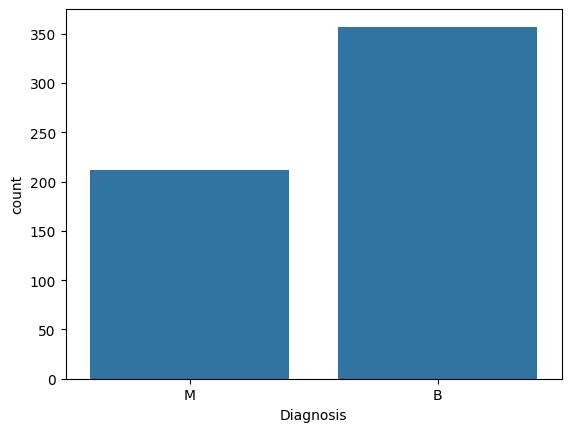

In [183]:
#Membuat gambar Diagram perbandingan antara Malignant dan Benign
sns.countplot(x= "Diagnosis",data= df)

In [184]:
#Mengubah M menjadi angka 0, dan B menjadi angka 1
def diagnosis_value(Diagnosis):
    if Diagnosis == 'M':
        return 0
    else:
        return 1
  
df['Diagnosis'] = df['Diagnosis'].apply(diagnosis_value)

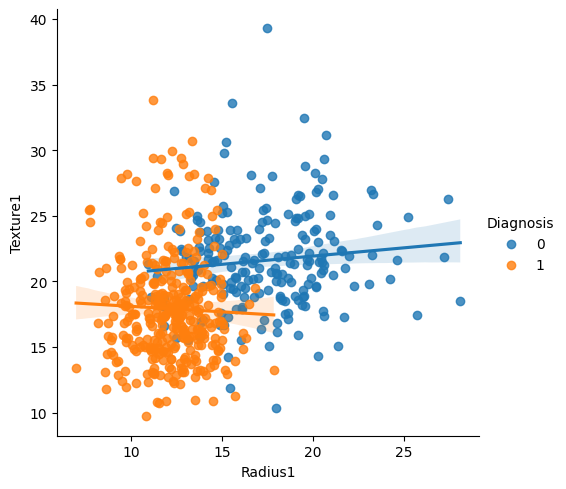

In [185]:
#Perbandingan rata-rata radius dan rata-rata tekstur
sns.lmplot(x = 'Radius1', y = 'Texture1', hue = 'Diagnosis', data = df)

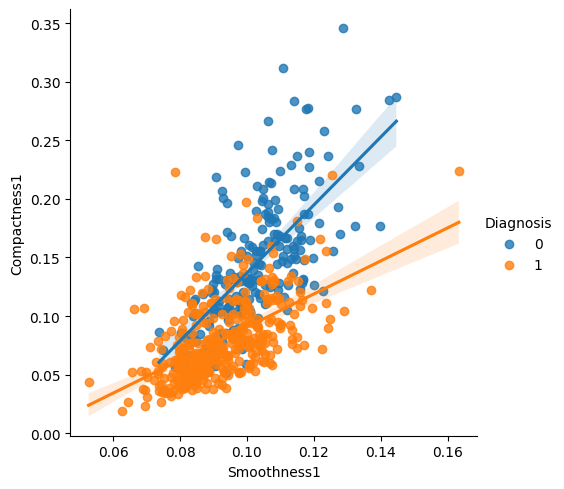

In [186]:
#Perbandingan rata- rata tingkat kelembutan dan rata - rata kepadatan
sns.lmplot(x ='Smoothness1', y = 'Compactness1', data = df, hue = 'Diagnosis')

In [187]:
#Mengeluarkan Diagnosis karna tidak memiliki bagian untuk prediksi
df.drop(['Diagnosis'], axis = 1)
df.dropna(axis=1,inplace=True)
print(df.shape)

(569, 31)


In [188]:
X = np.array(df.iloc[:, 1:])
y = np.array(df['Diagnosis'])

In [189]:
#Mengubah dataset ke Training set dan Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [190]:
#Melatih model KNN
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [191]:
#Prediksi akurasi skor
knn.score(X_test, y_test)

0.956140350877193

In [192]:

# Membaca input dari file CSV
def baca_input_csv(nama_file):
    with open(nama_file, 'r', encoding='utf-8-sig') as file_csv:
        pembaca_csv = csv.reader(file_csv)
        
        data_list = list(pembaca_csv)
        
        # Mengambil baris terakhir sebagai input
        input_data = np.asarray(data_list[-1], dtype=np.float64).reshape(1, -1)
        
        return input_data

# CSV input
nama_file_input = 'wdbc_input.csv'
input_data = baca_input_csv(nama_file_input)

# Melakukan prediksi
prediction = knn.predict(input_data)
print(prediction)

# Menampilkan hasil prediksi
if prediction[0] == 0:
    print('The Breast cancer is Malignant')
else:
    print('The Breast Cancer is Benign')


[1]
The Breast Cancer is Benign
